# **Predicting the Potential Acceptance of a COVID-19 Vaccine on Social Data**


*Oumaima Marbouh, Yasmine Guemouria, Daniel Quintão de Moraes, Mehdy Bennani, Júlia Togashi, Yousra Leouafi*


This challenge was done as a project for the Master 2 Data Science (2021/2022), DATACAMP course:
<br><br>


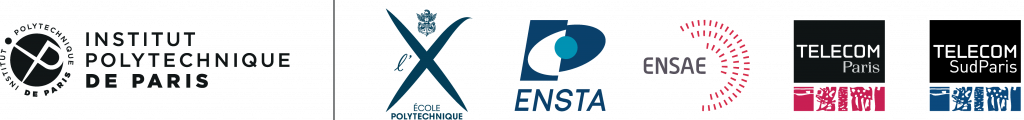

## **Introduction**

The coronavirus pandemic, is an ongoing pandemic of a respiratory disease caused by the severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2). On March 11, 2020, the World Health Organization (WHO) classified the outbreak as a Pandemic. In phase III development studies, several vaccines against COVID-19 have demonstrated efficacy of up to 95% in preventing symptomatic infections of the disease. As of March 2021, 12 vaccines have been authorized by at least one national regulatory authority for public use.

As we know, **acceptance of the vaccine** is not the same for everyone and varies according to various social factors. Better understanding the characteristics that lead someone to be unwilling to get the vaccine is a public health necessity. Moreover, the ability to individually predict an individual's likelihood to be vaccinated can be applied in various scenarios, such as for government-directed advertising or document control at borders between countries.

<br>

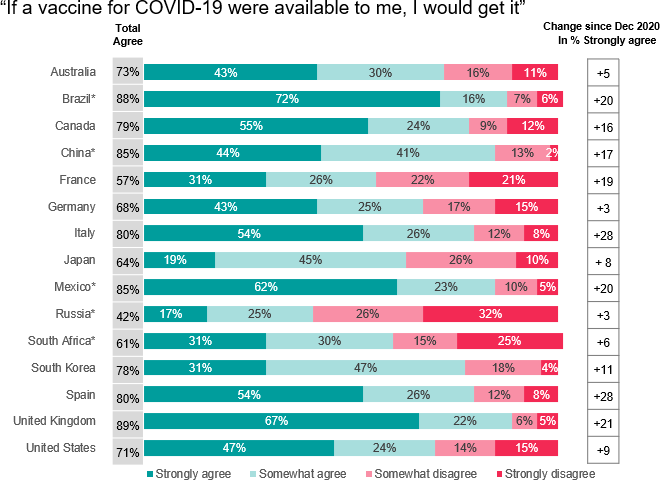

<br>

This project aims at constructing a machine learning model capable at predicting the answer to two questions: 
1.  **If a COVID-19 vaccine is proven safe and effective and is available to me, I will take it**
2.  **I would accept a vaccine if it were recommended by my employer and was approved safe and effective by the government**. 

Each question has 5 possible answers, ranging from "completely disagree" to "completely agree", as further described below.

Thus, we have a multitarget **and** multiclass classification problem.


## **Description of the data**

This challenge is inspired by [paper [1]](https://colab.research.google.com/drive/1ecPbK5CGqX5VlO_Zc_UhPABD4b-32kdM#scrollTo=1woNGwlgCIxB&line=1&uniqifier=1), which works with a recent survey on social-demographic data that seemed correlated to the acceptance of a COVID-19 vaccine on population. 

The data was previously cleaned by the group, as some inconsistencies were found in the answers of the original questionnaire answers. In addition, some transformations have been made to make the data more readable and understandable, for example, transforming the numerical coding of the country names to their corresponding names. The final data you dispose of is as follows:

<br>

#### **Input Data**
The input data is composed of the following information for each individual that answered the questionnaire: 

*   ``Country``(categorical), name of the individual's country of provenance.
*   ``trusthealth`` (binary) is a measure of whether the participant trusts the health system of its country or not.
*   ``sickwithCOVID`` (binary) whether either the person itself or a member of its family is sick with COVID (1) or neither case (0).
*   ``Age`` (numeric), self-explicative.
*   ``Age_group`` (categorical), technically redundant given the age ``Age`` (which completely determines the age group), but interesting for EDA and (maybe) for classification models, this is the age group of the participant according to the following convention:
    * 1: "18-24"
    * 2: "25-54"
    * 3: "55-64"
    * 4: "65+"
*   ``Universal_edu`` (categorical), according to the following conventions:
    * 1: Less than high school
    * 2: High school some college
    * 3: Bachelor
    * 4: Post Graduate
*   ``Gender`` (categorical) the gender, with categories Male, Female, and Other.
*   ``within_country`` (categorical) the income of the person in its own country standards, according to the convention:
    * 1: \<20%
    * 2: 20-40%
    * 3: 40-60%
    * 4: 60-80%
    * 5: \>80%
    * 6: Refused
*   ``world_wide`` (categorical) a "world wide" conversion of the person's income into dollars, according to the following convention:
    * 1: <\$2 per day
    * 2: \$2-\$8 per day
    * 3: \$8-\$32 per day
    * 4: \$32+
    * 5: *Not in the table*
    * 6: Refused
*   ``Language``(categorical) the (main) language of the person. We will not list the conventions here, but the interested user can deduce them from the data distribution using external demographic data (moreover, the convention is not detailed in the original paper)
*   ``covidcases`` (numeric) number of COVID-19 cases **in the person's country** in the moment of the survey.
*   ``coviddeaths`` (numeric) number of deaths due to COVID-19 **in the person's country** in the moment of the survey.
*   ``mortalityperm`` (numeric) number of deaths due to COVID-19 **per million of habitants in the person's country** in the moment of the survey.
*   ``trustngov`` (numeric between 0 and 1) is a metric of the average trust in government **within the person's country**. **Attention**: this column's values seem inconsistent with reality, if we consider [\[1\]](https://www.nature.com/articles/s41591-020-1124-9)'s excerpt "(...) Asian nations with strong trust in central governments (China, South Korea and Singapore)" for China's ``trustngov`` is 0.0, and Singapore's ``trustngov`` is not among the biggest ones in the table. Be cautious if using this feature...
*   ``poptrusthealth`` (numeric between 0 and 1) is a metric of the average trust in the health system **within the person's country**. Bigger values mean more trust.
*   ``Region``(categorical), the person's region within the country.
*   ``stringency_index``(numeric), a composite measure based on nine response indicators including school closures, workplace closures, and travel bans, rescaled to a value from 0 to 100 (100 =strictest). *(See Remarks section for additional information)*
*   ``population`` (numeric), the population of the person's country
*   ``death_rate`` (numeric), 100 * ``coviddeaths`` / ``population``
*   ``case_rate`` (numeric), 100 * ``covidcases`` / ``population``

<br>

#### **Output Data**

The output should be an ndarray of shape *(n_individuals_test, 2)* in which each row corresponds to the categorical answer to the 2 already mentioned questions in the order they were presented (first the vaccine availability question and then the employer-related question), which are present in the data set as the following columns:

*   ``Vaccine`` answer to "If a COVID-19 vaccine is proven safe and effective and is available to me:
      1. "Completely disagree"
      2. "Somewhat disagree"
      3. "Neutral/no opinion"
      4. "Somewhat agree"
      5. "Completely agree"

*   ``Business2``answer to "I would accept a vaccine if it were recommended by my employer and was approved safe and effective by the government": 
      1. "Completely disagree"
      2. "Somewhat disagree"
      3. "Neutral/no opinion"
      4. "Somewhat agree"
      5. "Completely agree"

<br>

#### **Remark - COVID-19 Stringency Index**

Based on the [Oxford Coronavirus Government Response Tracker (OxCGRT)](https://ourworldindata.org/grapher/covid-stringency-index) project, the Stringency Index is calculated using nine response metrics : School closures; workplace closures; cancellation of public events; restrictions on public gatherings; closures of public transport; stay-at-home requirements; public information campaigns; restrictions on internal movements; and international travel controls. It measures how 'strict' is a country while facing the Covid-19 pandemic. 

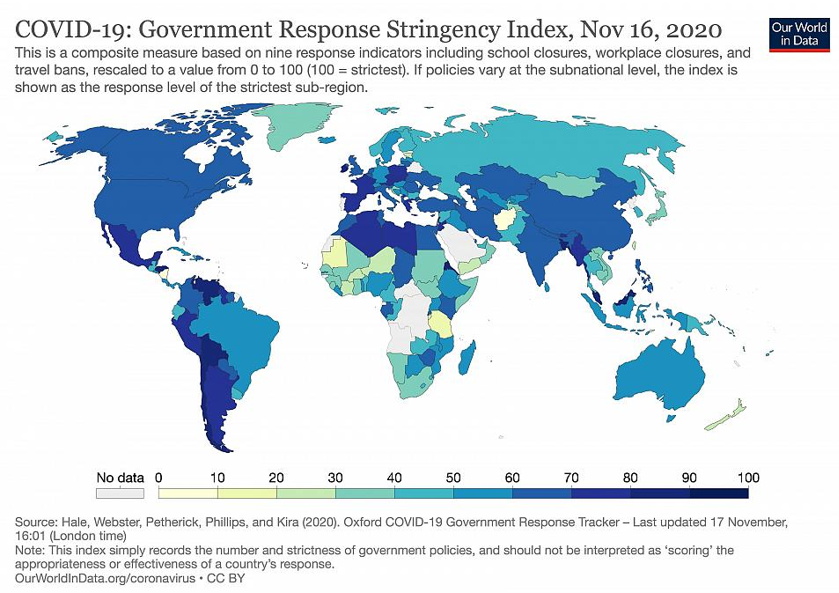

Using the Data provided by (OxCGRT), we added a new numeric column named ``stringency_index`` *(not included in original questionnaire)* that represents the stringency index of each country in September 2020, as the group found that this might be a useful information for the prediction.

<br>

#### **Evaluation Metric**

As evaluation metric, we will use the average (w.r.t. the 2 targets) of the *Balanced Accuracy Score* of each target over its 5 classes. For each class, the balanced accuracy score is defined as the average of the recalls per-class, so we can write it as follow for 2 targets $y$ and $y^\prime$ of classes 1 to 5:

$$
BAS = \frac{1}{2}\left[\sum_{c=1}^5\frac{TP_{y_c}}{TP_{y_c}+FN_{y_c}} + \sum_{c=1}^5\frac{TP_{y^\prime_c}}{TP_{y^\prime_c}+FN_{y^\prime_c}}\right]\in[0,1]
$$

The idea behind this metric is to give the same importance for all classes in each target despite any possible class imbalance. This definition in consistent with [sklearn's](https://scikit-learn.org/stable/modules/model_evaluation.html#balanced-accuracy-score) one, though there are variants for the multiclass case in the litterature, and note that the 
greater, the better.


## **Requirements for running the notebook**

To properly run the notebook, the following Python modules must be imported :

In [ ]:
!pip install ramp-workflow

     |████████████████████████████████| 126 kB 4.3 MB/s 


In [1]:
import pandas as pd
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import balanced_accuracy_score

from download_data import download_from_osf
from problem import get_train_data, get_test_data
from data_cleaning import fix_features_dtypes

sns.set(color_codes=True)

## Download data

In [2]:
download_from_osf()  # comment/uncomment if you have already/not yet downloaded the data

c:\Users\danie\Desktop\M2\Datacamp\group challenge\covid_vaccine_challenge\data directory is not empty. Please empty it or select another destination for LOCAL_DATA if you wish to proceed


## Reading data

In [2]:
X_train, y_train = get_train_data('./')
X_test, y_test = get_test_data('./')

In [3]:
X_train = pd.DataFrame(X_train, columns=['Country','trusthealth','sickwithCOVID','Age','Age_group','Universal_edu','Gender','within_country','world_wide','Language','covidcases','coviddeaths','mortalityperm','trustngov','poptrusthealth','Region','stringency_index','population','case_rate','death_rate'])
X_test = pd.DataFrame(X_test, columns=['Country','trusthealth','sickwithCOVID','Age','Age_group','Universal_edu','Gender','within_country','world_wide','Language','covidcases','coviddeaths','mortalityperm','trustngov','poptrusthealth','Region','stringency_index','population','case_rate','death_rate'])
y_train = pd.DataFrame(y_train, columns=['Vaccine', 'Business2'])
y_test = pd.DataFrame(y_test, columns=['Vaccine', 'Business2'])

## **Exploratory Data Analysis**

In [4]:
df = pd.concat([X_train, y_train], axis=1)  # make EDA functions easier
df = fix_features_dtypes(df)

### Correlation

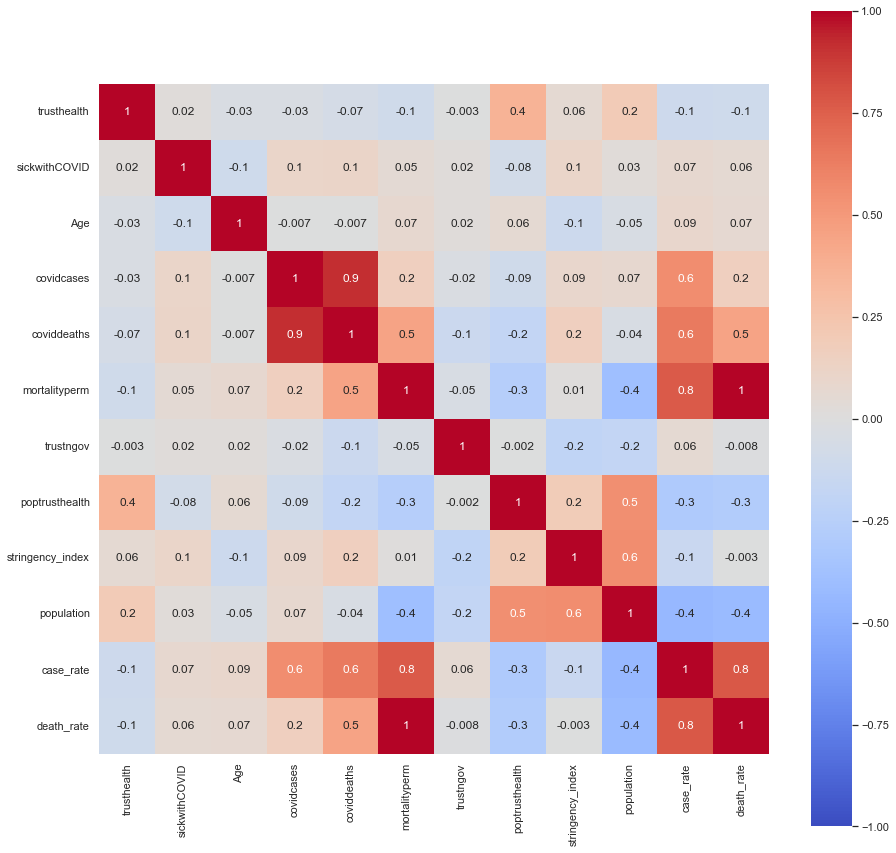

In [5]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap='coolwarm', annot=True, square=True,fmt='.1g')
plt.show()

### Other plots

The cell below defines 2 functions to make visualization easier. Tey were defined for the target ``Vaccine``, but it is trivial to adapt the code to show results for ``Business2``.

In [6]:
South_America =['Brazil', 'Ecuador']
North_America = ['Canada', 'Mexico', 'US']
Europe = ['France', 'Germany', 'Italy','Poland', 'Spain','Sweden', 'UK']
Africa = ['Nigeria', 'South_Africa']
Asia = ['China', 'India', 'Russia','Singapore', 'South_Korea']

continents = dict.fromkeys(South_America, 'South America')
continents = {**continents, **dict.fromkeys(North_America, 'North America')}
continents = {**continents, **dict.fromkeys(Europe, 'Europe')}
continents = {**continents, **dict.fromkeys(Africa, 'Africa')}
continents = {**continents, **dict.fromkeys(Asia, 'Asia')}

#------------------------------------------------------------------------------

def plot_one(col_grpby, title_acc_by_what):
  plt.figure(figsize=(15,6)) 
  dataframe  = df.copy()
  if col_grpby == "Continent":
    dataframe["Continent"] = dataframe["Country"].replace(continents)
  dataframe = dataframe.groupby([col_grpby])["Vaccine"].value_counts(normalize=True)
  dataframe = dataframe.mul(100)
  dataframe = dataframe.rename('percent').reset_index()
  
  ax = sns.barplot(x="level_1", y="percent", hue=col_grpby, data=dataframe)

  plt.title(f'Acceptancy of Vaccine by {title_acc_by_what}')
  ax.set_ylabel('Percentage of acceptency')
  ax.set_xlabel('Acceptancy Levels')
  ax.set_xticklabels(["Completely disagree", 
                      "Somewhat disagree", 
                      "Neutral/no opinion",
                      "Somewhat agree",
                      "Completely agree"], rotation=0, fontsize=10)

  plt.show()

#------------------------------------------------------------------------------

def plot_five(list_cols_grp_by):
  plt.subplots(5, 1, figsize=(15,25))
  labels = ["Completely disagree", 
            "Somewhat disagree", 
            "Neutral/no opinion",
            "Somewhat agree",
            "Completely agree"]

  plt.subplot(511)
  df_country = df[df['Country'].isin(South_America)].groupby(list_cols_grp_by)['Vaccine'].value_counts(normalize=True)
  df_country = df_country.mul(100)
  df_country = df_country.rename('percent').reset_index().dropna()
  df_country['Country'] = df_country['Country'].astype(CategoricalDtype(South_America))  # drop other continents
  if list_cols_grp_by == ['Country', 'trusthealth']:
    df_country['_'.join(["Country", "trusthealth"])] =  pd.Series(df_country.reindex(["Country", "trusthealth"], axis='columns')
                                     .astype('str')
                                     .values.tolist()
                                  ).str.join('_')
    ax=sns.barplot(x="level_2", y="percent", hue='_'.join(["Country", "trusthealth"]), data=df_country)
  else:
    ax = sns.barplot(x="level_1", y="percent", hue="Country", data=df_country)
  plt.title('Acceptancy of Vaccine by Country in South America')
  ax.set_ylabel('Percentage of acceptency')
  ax.set_xlabel('Acceptancy Levels')
  ax.set_xticklabels(labels)

  plt.subplot(512)
  df_country = df[df['Country'].isin(North_America)].groupby(list_cols_grp_by)['Vaccine'].value_counts(normalize=True)
  df_country = df_country.mul(100)
  df_country = df_country.rename('percent').reset_index().dropna()
  df_country['Country'] = df_country['Country'].astype(CategoricalDtype(North_America))  # drop other continents
  if list_cols_grp_by == ['Country', 'trusthealth']:
    df_country['_'.join(["Country", "trusthealth"])] =  pd.Series(df_country.reindex(["Country", "trusthealth"], axis='columns')
                                     .astype('str')
                                     .values.tolist()
                                  ).str.join('_')
    ax=sns.barplot(x="level_2", y="percent", hue='_'.join(["Country", "trusthealth"]), data=df_country)
  else:
    ax = sns.barplot(x="level_1", y="percent", hue="Country", data=df_country)
  plt.title('Acceptancy of Vaccine by Country in North America')
  ax.set_ylabel('Percentage of acceptency')
  ax.set_xlabel('Acceptancy Levels')
  ax.set_xticklabels(labels)

  plt.subplot(513)
  df_country = df[df['Country'].isin(Europe)].groupby(list_cols_grp_by)['Vaccine'].value_counts(normalize=True)
  df_country = df_country.mul(100)
  df_country = df_country.rename('percent').reset_index().dropna()
  df_country['Country'] = df_country['Country'].astype(CategoricalDtype(Europe))  # drop other continents
  if list_cols_grp_by == ['Country', 'trusthealth']:
    df_country['_'.join(["Country", "trusthealth"])] =  pd.Series(df_country.reindex(["Country", "trusthealth"], axis='columns')
                                     .astype('str')
                                     .values.tolist()
                                  ).str.join('_')
    ax=sns.barplot(x="level_2", y="percent", hue='_'.join(["Country", "trusthealth"]), data=df_country)
  else:
    ax = sns.barplot(x="level_1", y="percent", hue="Country", data=df_country)
  plt.title('Acceptancy of Vaccine by Country in Europe')
  ax.set_ylabel('Percentage of acceptency')
  ax.set_xlabel('Acceptancy Levels')
  ax.set_xticklabels(labels)

  plt.subplot(514)
  df_country = df[df['Country'].isin(Africa)].groupby(list_cols_grp_by)['Vaccine'].value_counts(normalize=True)
  df_country = df_country.mul(100)
  df_country = df_country.rename('percent').reset_index().dropna()
  df_country['Country'] = df_country['Country'].astype(CategoricalDtype(Africa))  # drop other continents
  if list_cols_grp_by == ['Country', 'trusthealth']:
    df_country['_'.join(["Country", "trusthealth"])] =  pd.Series(df_country.reindex(["Country", "trusthealth"], axis='columns')
                                     .astype('str')
                                     .values.tolist()
                                  ).str.join('_')
    ax=sns.barplot(x="level_2", y="percent", hue='_'.join(["Country", "trusthealth"]), data=df_country)
  else:
    ax = sns.barplot(x="level_1", y="percent", hue="Country", data=df_country)
  plt.title('Acceptancy of Vaccine by Country in Africa')
  ax.set_ylabel('Percentage of acceptency')
  ax.set_xlabel('Acceptancy Levels')
  ax.set_xticklabels(labels)

  plt.subplot(515)
  df_country = df[df['Country'].isin(Asia)].groupby(list_cols_grp_by)['Vaccine'].value_counts(normalize=True)
  df_country = df_country.mul(100)
  df_country = df_country.rename('percent').reset_index().dropna()
  df_country['Country'] = df_country['Country'].astype(CategoricalDtype(Asia))  # drop other continents
  if list_cols_grp_by == ['Country', 'trusthealth']:
    df_country['_'.join(["Country", "trusthealth"])] =  pd.Series(df_country.reindex(["Country", "trusthealth"], axis='columns')
                                     .astype('str')
                                     .values.tolist()
                                  ).str.join('_')
    ax=sns.barplot(x="level_2", y="percent", hue='_'.join(["Country", "trusthealth"]), data=df_country)
  else:
    ax = sns.barplot(x="level_1", y="percent", hue="Country", data=df_country)
  plt.title('Acceptancy of Vaccine by Country in Asia')
  ax.set_ylabel('Percentage of acceptency')
  ax.set_xlabel('Acceptancy Levels')
  ax.set_xticklabels(labels)

  plt.tight_layout()
  plt.show()

You can uncomment the line corresponding to the desired visualization or add your owns:

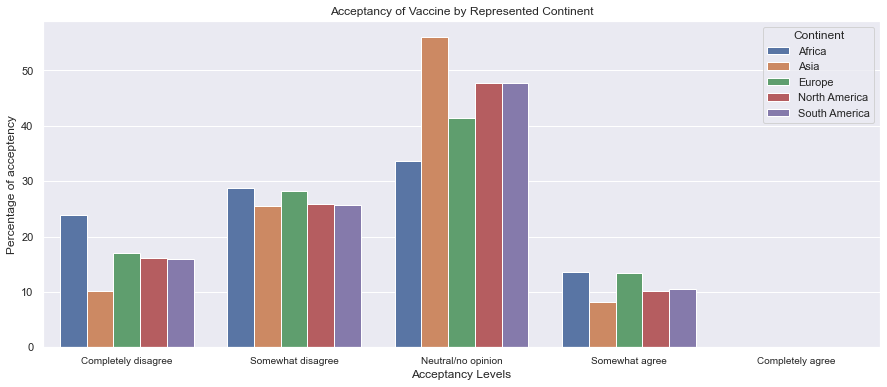

In [7]:
plot_one("Continent", "Represented Continent")
# plot_one("trusthealth", "Trust in the health system")
# plot_one("Gender", "Gender")
# plot_one("Age_group", "Age Group")
# plot_one("within_country", "Income Level Within Country")
#plot_one("world_wide", "Income Level World Wide")

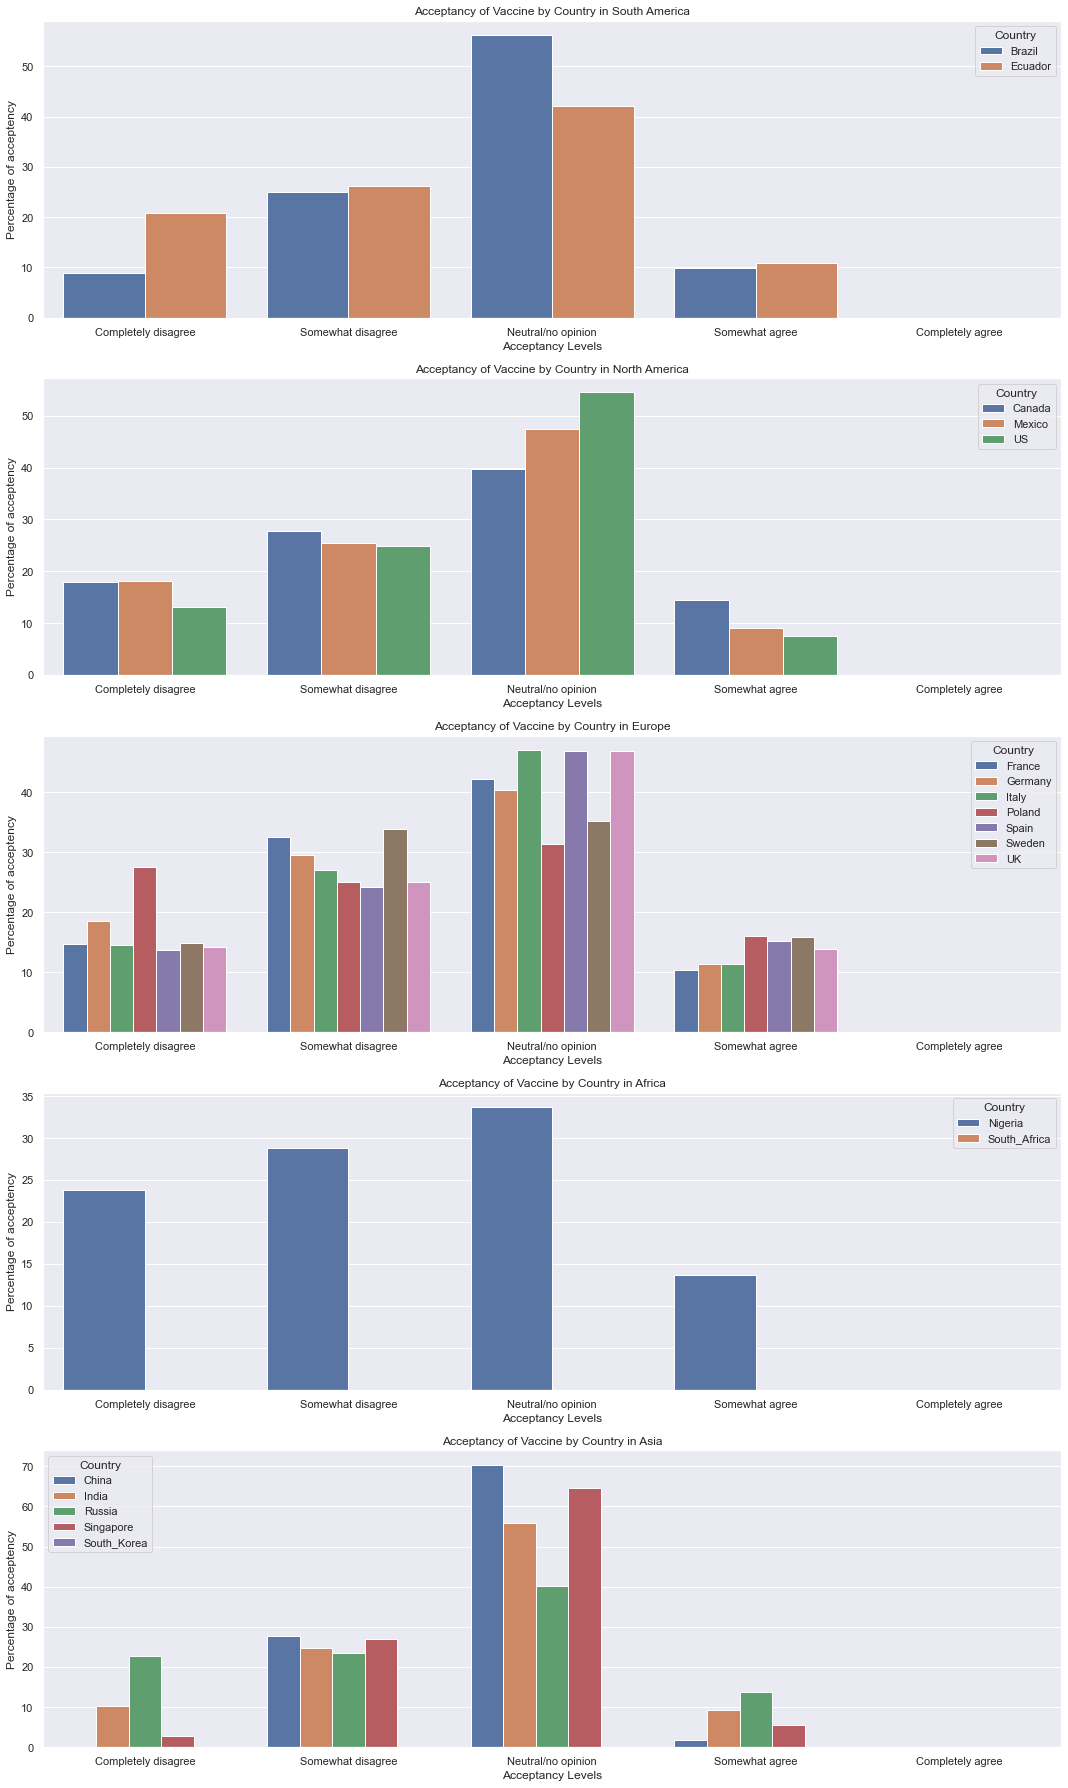

In [8]:
plot_five(['Country'])
# plot_five(['Country', 'trusthealth'])


## **Baseline Model: XGBoost Classifier**

After the feature engineering process, we used a random forest and an xgboost model to predict each one of our labels (Business2, Vaccine) seperately and combined. Finally, we choosed the xgboost trained on the target variables seperately after comparing their metrics results.

**Variables Selection**



In [9]:
numeric_features=['trusthealth', 'sickwithCOVID', 'Age', 'Language', 'mortalityperm', 'trustngov', 'poptrusthealth', 'Region', 'stringency_index', 'case_rate', 'death_rate']
categorical_features = ['Country', 'Universal_edu', 'Age_group', 'Gender','within_country', 'world_wide' ]

**Pipeline Creation**

We applied:


1.   OneHotEncoding on categorical variables
2.   Normalisation on numerical variables



In [10]:
import xgboost as xgb
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, LabelEncoder
from sklearn.pipeline import Pipeline

In [11]:
label_enc_vac = LabelEncoder()
label_enc_vac.fit(y_train['Vaccine'])
label_enc_bus = LabelEncoder()
label_enc_bus.fit(y_train['Business2'])

LabelEncoder()

In [12]:
#Preprocessing
preprocessor = ColumnTransformer([
    ("hot_encoder", OneHotEncoder(), categorical_features),
    ("scaler", MinMaxScaler(), numeric_features),
])
#Pipeline   
model = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", xgb.XGBClassifier(n_estimators=100, objective='multi:softmax',
                                     use_label_encoder=False, eval_metric='mlogloss')),
])
#Fiting the model on the first target variable "Vaccine"
model.fit(X_train, label_enc_vac.transform(y_train['Vaccine']))

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('hot_encoder',
                                                  OneHotEncoder(),
                                                  ['Country', 'Universal_edu',
                                                   'Age_group', 'Gender',
                                                   'within_country',
                                                   'world_wide']),
                                                 ('scaler', MinMaxScaler(),
                                                  ['trusthealth',
                                                   'sickwithCOVID', 'Age',
                                                   'Language', 'mortalityperm',
                                                   'trustngov',
                                                   'poptrusthealth', 'Region',
                                                   'stringency_index',
                                   

In [13]:
#Predictions for the first target variable "Vaccine"
predictions1 = model.predict(X_test)
metric1 =  balanced_accuracy_score(label_enc_vac.transform(y_test['Vaccine']), predictions1)
print('Test Accuracy for vaccine:', metric1)

Test Accuracy for vaccine: 0.5282914150287127


`**Remarks:**` We can see that stringency_index has the higher correlation with the target variable.

In [14]:
#Fiting the model on the second target variable "Business2"
model.fit(X_train, label_enc_bus.transform(y_train['Business2']))
predictions2 = model.predict(X_test)
metric2 = balanced_accuracy_score(label_enc_bus.transform(y_test['Business2']), predictions2)
print('Test Accuracy for Business2:', metric2)

Test Accuracy for Business2: 0.5914445118573342


`**Remarks:**` We can see that trusthealth variable has the higher correlation with the target variable "Business2".

**Model Evaluation**

In [15]:
BAS = (metric1 + metric2)/2
print('The Balanced Accuracy Score of the Basline Model is:', BAS)

The Balanced Accuracy Score of the Basline Model is: 0.5598679634430235


## **Quick submission test**

You can test any submission locally by running:

```
ramp-test --submission <submission folder>
```
If you want to quickly test the that there are no obvious code errors, use the `--quick-test` flag to only use a small subset of the data.

```
ramp-test --submission <submission folder> --quick-test
```

See the [online documentation](https://paris-saclay-cds.github.io/ramp-docs/ramp-workflow/stable/using_kits.html) for more details.

## **References**

[1] Lazarus, J.V., Ratzan, S.C., Palayew, A. et al. A global survey of potential acceptance of a COVID-19 vaccine. Nat Med 27, 225–228 (2021). https://doi.org/10.1038/s41591-020-1124-9